<a href="https://colab.research.google.com/github/michsund/DATA612_Assignments/blob/main/Sunderman_612proj_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project: Driven Data Competition

In [782]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [783]:
train = pd.read_csv('https://github.com/michsund/DATA612_Assignments/raw/main/training%20set%20values.csv', skipinitialspace=True)

In [784]:
tlabel = pd.read_csv('https://github.com/michsund/DATA612_Assignments/raw/main/training%20set%20labels.csv')

In [785]:
test = pd.read_csv('https://github.com/michsund/DATA612_Assignments/raw/main/test%20set%20values.csv')

In [786]:
train.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [787]:
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2/4/2013,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2/4/2013,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2/1/2013,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,1/22/2013,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,3/27/2013,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [788]:
train.shape

(59400, 40)

In [789]:
tlabel.status_group.unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [790]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [791]:
train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [792]:
labels = tlabel.status_group

In [793]:
train = train.join(labels)

In [794]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [795]:
train = train.drop(columns=['scheme_name'])

In [796]:
train.recorded_by.unique()

array(['GeoData Consultants Ltd'], dtype=object)

In [797]:
train = train.drop(columns='recorded_by')

In [798]:
noyear = train[(train['construction_year'] == 0)]
noyear.shape

(20709, 39)

In [799]:
nowpt = train[(train['wpt_name'] == 'none')]
nowpt.shape

(3563, 39)

In [800]:
nopop = train[(train['population'] == 0)]
nopop.shape

(21381, 39)

In [801]:
label_mapping = {'functional' : 0,
                 'non functional' : 1,
                 'functional needs repair' : 2}

train['status_group'] = train['status_group'].map(label_mapping)
train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,5/3/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,Water Board,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
59396,27263,4700.0,5/7/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,VWC,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,0
59397,37057,0.0,4/11/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,VWC,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,0
59398,31282,0.0,3/8/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,VWC,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,0


In [802]:
train.funder.value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Dmdd/solider                 1
Jacobin                      1
Rajabu Athumani              1
Mwamama                      1
Long Ga                      1
Name: funder, Length: 1897, dtype: int64

In [803]:
train.installer.value_counts()

DWE                     17402
Government               1825
RWE                      1206
Commu                    1060
DANIDA                   1050
                        ...  
ACT MARA                    1
TANZANIAN GOVERNMENT        1
Anglikana                   1
CVS Miss                    1
Zao water spring X          1
Name: installer, Length: 2145, dtype: int64

In [804]:
train.extraction_type_class.value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [805]:
class_mapping = {'gravity' : 1,
                 'handpump' : 2,
                 'other' : 3,
                 'submersible' : 4,
                 'motorpump' : 5, 
                 'rope pump' : 6,
                 'wind-powered' : 7}

train['extraction_type_class'] = train['extraction_type_class'].map(class_mapping)
test['extraction_type_class'] = test['extraction_type_class'].map(class_mapping)

In [806]:
train.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [807]:
man_mapping = {'vwc' : 1,
                 'wug' : 2,
                 'water board' : 3,
                 'wua' : 4,
                 'private operator' : 5, 
                 'parastatal' : 6,
                 'water authority' : 7,
               'other' : 8,
               'company' : 9,
               'unknown' : 10,
               'other - school' : 11,
               'trust' : 12}

train['management'] = train['management'].map(man_mapping)
test['management'] = test['management'].map(man_mapping)

In [808]:
train.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [809]:
pay_mapping = {'never pay' : 1,
                 'per bucket' : 2,
                 'monthly' : 3,
                 'unknown' : 4,
                 'on failure' : 5, 
                 'annually' : 6,
                 'other' : 7}

train['payment_type'] = train['payment_type'].map(pay_mapping)
test['payment_type'] = test['payment_type'].map(pay_mapping)

In [810]:
train.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [811]:
train = train[train['public_meeting'].notna()]

In [812]:
train['public_meeting'] = train.public_meeting.astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [813]:
tpmmap = {'True' : 1,
          'False' : 0,
          'NaN' : 2}
test['public_meeting'] = test['public_meeting'].map(tpmmap)

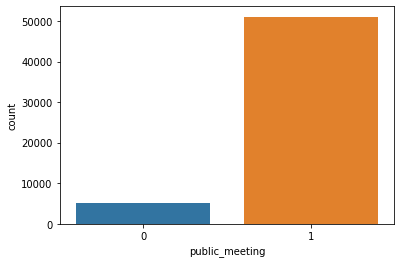

In [814]:
g = sns.countplot(x='public_meeting', data=train)

In [815]:
train = train[train['permit'].notna()]

In [816]:
train['permit'] = train.permit.astype(int)

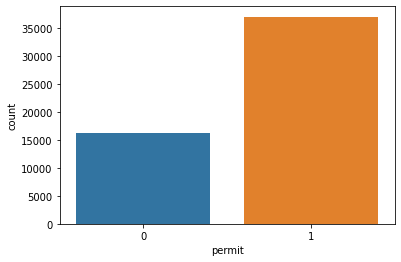

In [817]:
g = sns.countplot(x='permit', data=train)

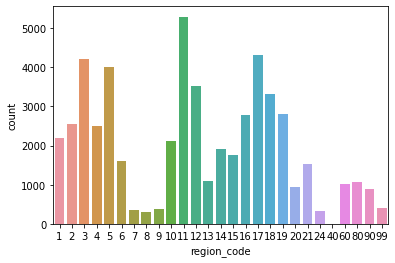

In [818]:
g = sns.countplot(x='region_code', data=train)

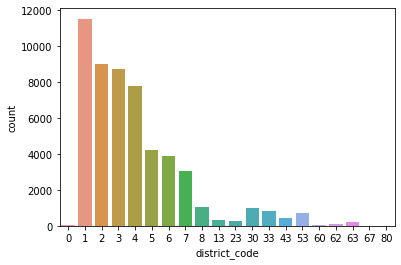

In [819]:
g = sns.countplot(x='district_code', data=train)

In [820]:
train.water_quality.value_counts()

soft                  46164
salty                  4382
unknown                1087
milky                   733
coloured                478
salty abandoned         238
fluoride                183
fluoride abandoned       16
Name: water_quality, dtype: int64

In [821]:
wq_mapping = {'soft' : 1,
                 'salty' : 2,
                 'unknown' : 3,
                 'milky' : 4,
                 'coloured' : 5, 
                 'salty abandoned' : 6,
                 'fluoride' : 7, 
                 'fluoride abandoned' : 8}

train['water_quality'] = train['water_quality'].map(wq_mapping)
test['water_quality'] = test['water_quality'].map(wq_mapping)

In [822]:
train.quantity.value_counts()

enough          30238
insufficient    13449
dry              5429
seasonal         3754
unknown           411
Name: quantity, dtype: int64

In [823]:
wquan_mapping = {'enough' : 1,
                 'insufficient' : 2,
                 'dry' : 3,
                 'seasonal' : 4,
                 'unknown' : 5}

train['quantity'] = train['quantity'].map(wquan_mapping)
test['quantity'] = test['quantity'].map(wquan_mapping)

In [824]:
train.source.value_counts()

spring                  15372
shallow well            15045
machine dbh              9578
river                    9180
rainwater harvesting     1865
hand dtw                  785
lake                      628
dam                       589
other                     197
unknown                    42
Name: source, dtype: int64

In [825]:
source_mapping = {'spring' : 1,
                 'shallow well' : 2,
                 'machine dbh' : 3,
                 'river' : 4,
                 'rainwater harvesting' : 5, 
                 'hand dtw' : 6,
                 'lake' : 7, 
                 'dam' : 8,
                  'other' : 9,
                  'unknown' : 10}

train['source'] = train['source'].map(source_mapping)
test['source'] = test['source'].map(source_mapping)

In [826]:
train.waterpoint_type.value_counts()

communal standpipe             25176
hand pump                      15824
communal standpipe multiple     5768
other                           5652
improved spring                  769
cattle trough                     86
dam                                6
Name: waterpoint_type, dtype: int64

In [827]:
wpt_mapping = {'communal standpipe' : 1,
                 'hand pump' : 2,
                 'communal standpipe multiple' : 3,
                 'other' : 4,
                 'improved spring' : 5, 
                 'cattle trough' : 6,
                 'dam' : 7}

train['waterpoint_type'] = train['waterpoint_type'].map(wpt_mapping)
test['waterpoint_type'] = test['waterpoint_type'].map(wpt_mapping)

In [828]:
train.waterpoint_type_group.value_counts()

communal standpipe    30944
hand pump             15824
other                  5652
improved spring         769
cattle trough            86
dam                       6
Name: waterpoint_type_group, dtype: int64

In [829]:
wtg_mapping = {'communal standpipe' : 1,
                 'hand pump' : 2,
                 'other' : 3,
                 'improved spring' : 4,
                 'cattle trough' : 5, 
                  'dam' : 6}

train['waterpoint_type_group'] = train['waterpoint_type_group'].map(wtg_mapping)
test['waterpoint_type_group'] = test['waterpoint_type_group'].map(wtg_mapping)

In [830]:
train.source_class.value_counts()

groundwater    40780
surface        12262
unknown          239
Name: source_class, dtype: int64

In [831]:
scmap = {'groundwater' : 1,
         'surface' : 2, 
         'unknown': 3}
train['source_class'] = train['source_class'].map(scmap)
test['source_class'] = test['source_class'].map(scmap)

In [832]:
train.source_type.value_counts()

spring                  15372
shallow well            15045
borehole                10363
river/lake               9808
rainwater harvesting     1865
dam                       589
other                     239
Name: source_type, dtype: int64

In [833]:
stmap = {'spring' : 1, 
         'shallow well' : 2,
         'borehole' : 3, 
         'river/lake' : 4,
         'rainwater harvesting' : 5,
         'dam' : 6, 
         'other' : 7}
      
train['source_type'] = train['source_type'].map(stmap)
test['source_type'] = test['source_type'].map(stmap)

In [834]:
train.basin.value_counts()

Pangani                    8646
Lake Victoria              8596
Rufiji                     7939
Internal                   6298
Lake Tanganyika            6143
Wami / Ruvu                5505
Ruvuma / Southern Coast    4137
Lake Nyasa                 3605
Lake Rukwa                 2412
Name: basin, dtype: int64

In [835]:
basin_map = {'Pangani' : 1,
                 'Lake Victoria' : 2,
                 'Rufiji' : 3,
                 'Internal' : 4,
                 'Lake Tanganyika' : 5, 
                 'Wami / Ruvu' : 6,
                 'Ruvuma / Southern Coast' : 7, 
                 'Lake Nyasa' : 8,
                  'Lake Rukwa' : 9}

train['basin'] = train['basin'].map(basin_map)
test['basin'] = test['basin'].map(basin_map)

In [836]:
train.quantity_group.value_counts()

enough          30238
insufficient    13449
dry              5429
seasonal         3754
unknown           411
Name: quantity_group, dtype: int64

In [837]:
train.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,8,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,1,VWC,0,1999,gravity,gravity,1,1,user-group,pay annually,6,1,good,1,enough,1,1,1,1,1,0
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,1,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,1,VWC,1,2009,gravity,gravity,1,1,user-group,pay per bucket,2,1,good,1,enough,8,6,2,3,1,0
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,7,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,1,VWC,1,1986,submersible,submersible,4,1,user-group,never pay,1,1,good,3,dry,3,3,1,3,1,1
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,2,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,1,NaN,1,0,gravity,gravity,1,8,other,never pay,1,1,good,4,seasonal,5,5,2,1,1,0
5,9944,20.0,3/13/2011,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,1,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,1,VWC,1,2009,submersible,submersible,4,1,user-group,pay per bucket,2,2,salty,1,enough,9,7,3,3,1,0


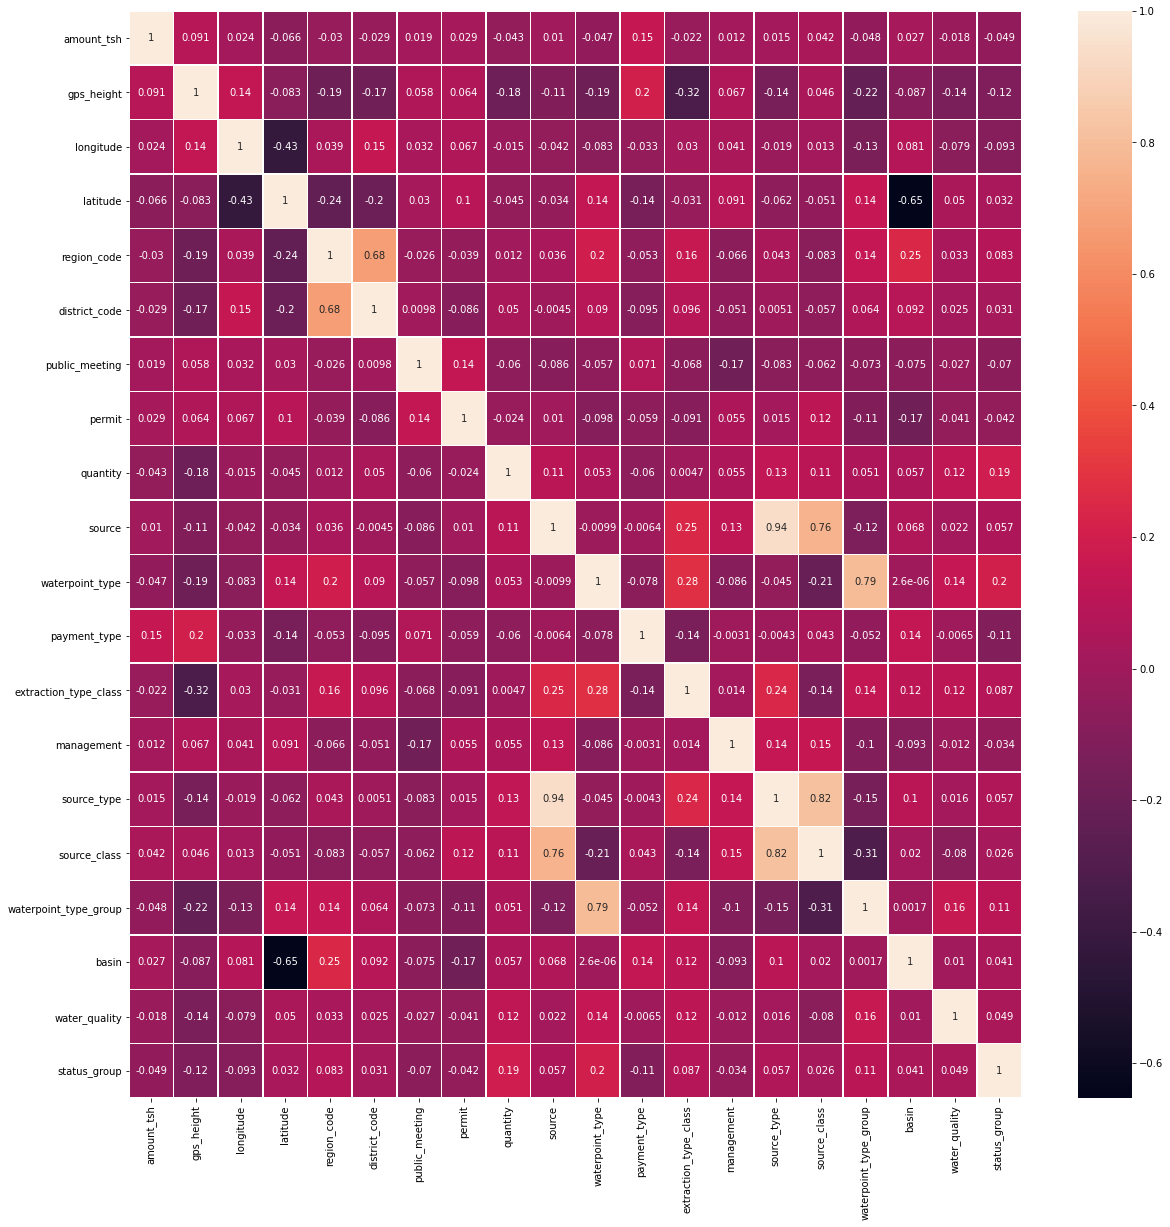

In [838]:
fig, ax = plt.subplots(figsize=(20,20))
g = sns.heatmap(train[["amount_tsh","gps_height","longitude","latitude","region_code", "district_code", "public_meeting", "permit", "quantity", "source", "waterpoint_type", "payment_type", "extraction_type_class", "management", "source_type", "source_class", "waterpoint_type_group", "basin", "water_quality", "status_group"]].corr(),annot=True, linewidths=.5)

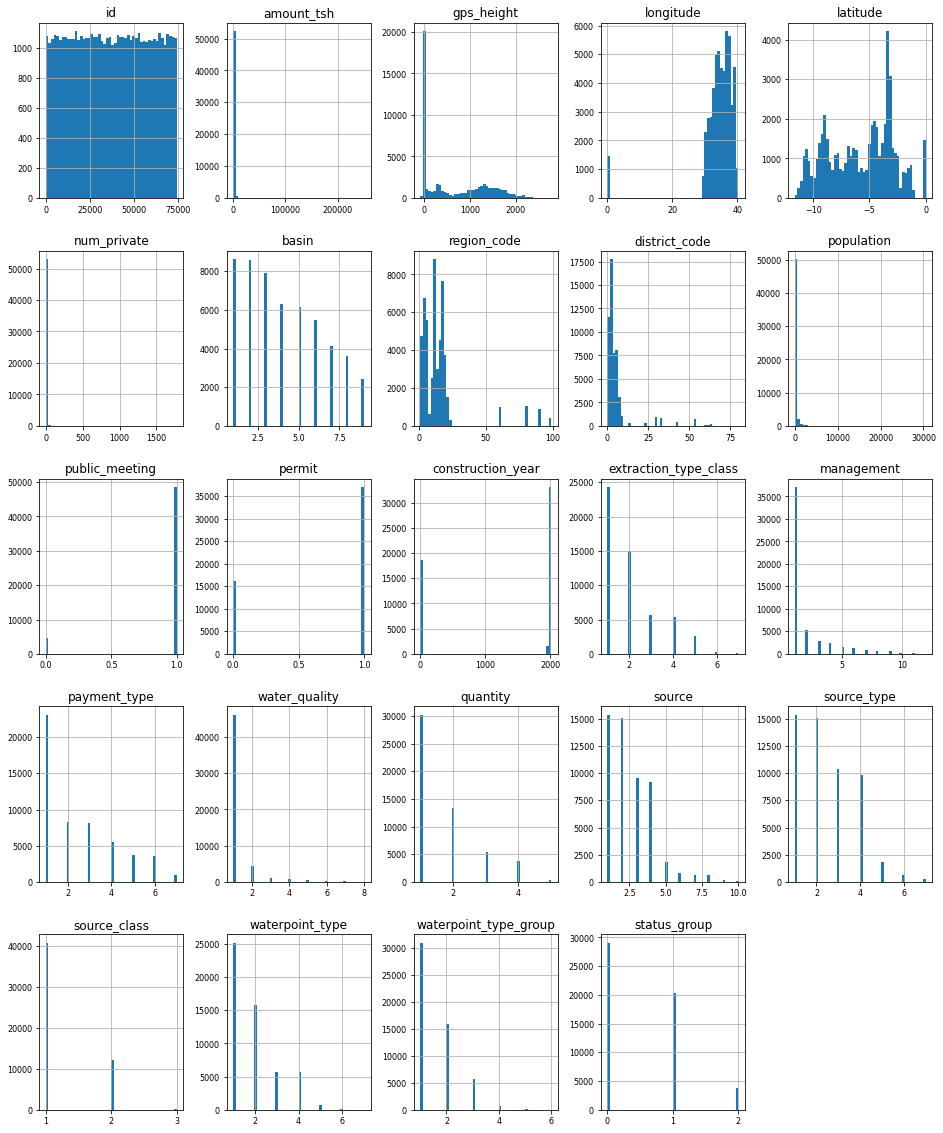

In [839]:
hist = train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [840]:
print((train["status_group"].value_counts())*100/len(train["status_group"]))

0    54.550403
1    38.191851
2     7.257747
Name: status_group, dtype: float64


In [841]:
xtrain = train[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'quantity', 'payment_type', 'extraction_type_class', 'waterpoint_type', 'source_type', 'waterpoint_type_group', 'source_class']].copy()

In [842]:
ytrain = train[['status_group']].copy()

In [843]:
xtest = test[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'quantity', 'payment_type', 'extraction_type_class', 'waterpoint_type', 'source_type', 'waterpoint_type_group', 'source_class']].copy()

In [844]:
print(xtrain.shape, ytrain.shape)

(53281, 13) (53281, 1)


In [845]:
xtrain.head(1)

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,quantity,payment_type,extraction_type_class,waterpoint_type,source_type,waterpoint_type_group,source_class
0,6000.0,1390,34.938093,-9.856322,11,5,1,6,1,1,1,1,1


In [846]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
train_std = stdsc.fit_transform(xtrain)
test_std = stdsc.fit_transform(xtest)

In [847]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_std, ytrain, test_size=0.3, random_state=1, stratify=ytrain)

In [848]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.fit_transform(x_test)

In [849]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20)}

grid_search = GridSearchCV(logreg,param_grid, cv = 5, n_jobs = -1,verbose = 1)

In [850]:
lr_gs = grid_search.fit(x_train_std, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 197 out of 200 | elapsed:   31.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   31.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [851]:
print("best parameters", grid_search.best_params_)
print("accuracy", grid_search.best_score_)

best parameters {'C': 0.23357214690901212, 'penalty': 'l2'}
accuracy 0.6552981607766784


In [852]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
lr = LogisticRegression(random_state=1, multi_class='auto', solver='liblinear', C=0.62, penalty='l2')
lr.fit(x_train_std, y_train.values.ravel())
print('Training accuracy:', lr.score(x_train_std, y_train))
print('Test accuracy:', lr.score(x_test_std, y_test))

Training accuracy: 0.6578721578721579
Test accuracy: 0.6559274319674695


In [853]:
applr = lr.predict(xtest)
predictions = pd.DataFrame(applr)
predictions.head(5)

,0
0,0
1,0
2,0
3,1
4,0


In [854]:
output = pd.concat((test['id'], predictions), axis=1)
output.columns=['id', 'status_group']

In [855]:
output.head()

,id,status_group
0,50785,0
1,51630,0
2,17168,0
3,45559,1
4,49871,0


In [856]:
label_mapping2 = {0 : 'functional',
                 1 : 'non functional',
                 2 : 'functional needs repair'}

output['status_group'] = output['status_group'].map(label_mapping2)

In [781]:
from google.colab import files
output.to_csv('612projectv2.csv') 
files.download('612projectv2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>